# My project 1

#### In this project, I extracted information and recorded anime data into a database using sqlite3 from this website: "https://animego.org", namely extracted: title, year and rating.

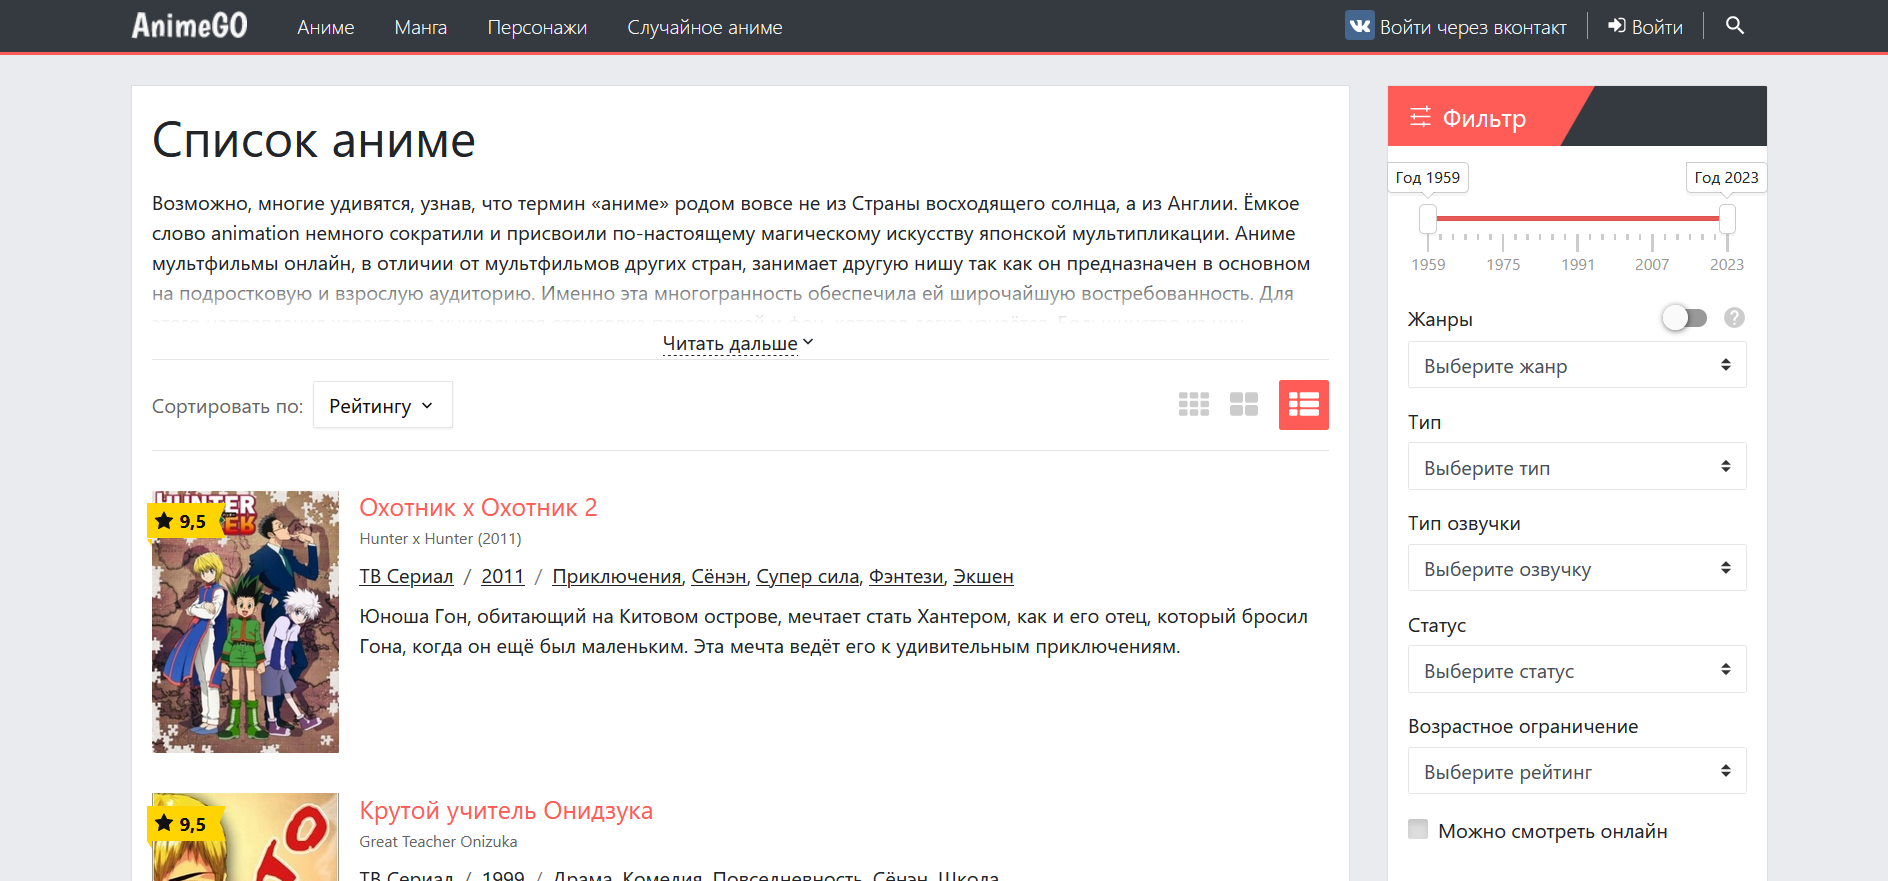

In [81]:
from IPython.display import Image
Image(filename='animego.png')

#### We connect the appropriate libraries 

###### __requests__ - allows you to interact with websites and web services
###### __BeautifulSoup__ - allows you to analyze the content of web pages, extract data from tags and attributes
###### __sqlite3__ - provides the ability to create, store and operate SQLite databases

In [79]:
import requests
from bs4 import BeautifulSoup
import sqlite3

We add the url and prepare for parsing, we also create a database using sqlite3

In [ ]:

url = "https://animego.org/anime?sort=r.rating&direction=desc"

headers = {
    'Accept': '*/*',
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/115.0'
}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

list_items = soup.find_all('div', class_='col-12')


conn = sqlite3.connect('data_anime1.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS data_anime1 (
        id INTEGER PRIMARY KEY,
        title TEXT,
        year_graduat TEXT,
        rate TEXT
    )
''')

#назва епизоди год випуска  рейтинг статус тип(тв сериал) озвучка 

##### The main unit of the program for extracting data and recording them in the database

In [ ]:
for item in list_items:
    
    name_caption_div = item.find(class_='media-body')
    
    if name_caption_div:
        name_element = name_caption_div.find('a')
        if name_element:
            name = name_element.get_text()
            print("Назва:", name)
    
    year_element = item.find('span', class_='anime-year mb-2')
    
    if year_element:
        year = year_element.get_text()
        print("Рік випуску:", year)
    else:
        print("Рік випуску: Не знайдено")
    
    anime_rate_element = item.find(class_='p-rate-flag__text')
    
    if anime_rate_element:
        anime_rate = anime_rate_element.text
        print("Рейтинг:", anime_rate)
    
    print("="*50)

    cursor.execute('INSERT INTO data_anime1 (title, year_graduat, rate) VALUES (?, ?, ?)',
                   (name, year, anime_rate))

conn.commit()
conn.close()

print("База даних створена та заповнена.")

##### Output of data recorded in the database

In [78]:
conn = sqlite3.connect('data_anime1.db')
cursor = conn.cursor()

cursor.execute("SELECT * FROM data_anime1")
rows = cursor.fetchall()

for row in rows:
    print(row)

conn.close()

(1, 'Охотник х Охотник 2', '2011', '9,5')
(2, 'Крутой учитель Онидзука', '1999', '9,5')
(3, 'Магическая битва 2', '2023', '9,5')
(4, 'Блич: Тысячелетняя кровавая война', '2022', '9,5')
(5, 'Восемьдесят шесть. Часть 2', '2021', '9,5')
(6, 'Код Гиас: Восставший Лелуш 2', '2008', '9,5')
(7, 'Вайолет Эвергарден. Фильм', '2020', '9,5')
(8, 'Клинок, рассекающий демонов: Квартал красных фонарей', '2021', '9,5')
(9, 'Унесённые призраками', '2001', '9,5')
(10, 'Агент времени 2', '2023', '9,5')
(11, 'Реинкарнация безработного: История о приключениях в другом мире 2', '2023', '9,5')
(12, 'Реинкарнация безработного: История о приключениях в другом мире. Часть 2', '2021', '9,5')
(13, 'Гуррен-Лаганн', '2007', '9,5')
(14, 'Стальной алхимик: Братство', '2009', '9,5')
(15, 'Магистр дьявольского культа 3', '2021', '9,5')
(16, 'Агент времени', '2021', '9,5')
(17, 'Ходячий замок', '2004', '9,5')
(18, 'Предсмертный список зомби', '2023', '9,5')
(19, 'Корзинка фруктов: Финал', '2021', '9,5')
(20, 'Мой счаст